<a href="https://colab.research.google.com/github/GKandula/Pneumonia-Detection-Model/blob/main/Detection_Algorithim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pylab as plt
import tensorflow_hub as hub
import numpy as np
import pandas as pd

import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
drive.mount('/content/drive')

import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

data_root = '/tmp/chest_xray/train'


Mounted at /content/drive


# Data Loading

In [ ]:
image_size = (255, 255)
batch_size = 32


#Data generators

test_root = '/content/test_data'

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_batches = train_datagen.flow_from_directory(
    data_root,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='training'
)

validation_batches = train_datagen.flow_from_directory(
    data_root,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='validation'
)

test_batches = train_datagen.flow_from_directory(
    data_root,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    subset='validation'
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5)
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show

(32, 255, 255, 3)
[1. 0. 1. 1. 0.]
{'NORMAL': 0, 'PNEUMONIA': 1}


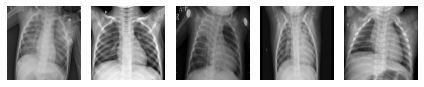

In [ ]:
imgs, labels = train_batches[0]
plotImages(imgs)

print(imgs.shape)
print(labels[0:5])
print(train_batches.class_indices)

# Model

In [ ]:
model = keras.Sequential([
  layers.Conv2D(16, 3, input_shape=[255, 255, 3], padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=[2, 2]),
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=[2, 2]),
  layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=[2, 2]),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation='softmax')
])



model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
history = model.fit(train_batches, validation_data=validation_batches, epochs=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:


import os


def load_image(img_path, show=False):

    img = tf.keras.utils.load_img(img_path, target_size=(255, 255))
    img_tensor = tf.keras.utils.img_to_array(img)               # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # image path
    img_path = '/content/test_image/Test image.jpeg'


    # load a single image
    new_image = load_image(img_path)

    # check prediction
    pred = model.predict(new_image)

    print(pred)

1/1 [==============================] - 0s 17ms/step
[[1.1863992e-06 9.9999881e-01]]


In [ ]:


import os


def load_image(img_path1, show=False):

    img1 = tf.keras.utils.load_img(img_path, target_size=(255, 255))
    img_tensor1 = tf.keras.utils.img_to_array(img1)               # (height, width, channels)
    img_tensor1 = np.expand_dims(img_tensor1, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor1 /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor1[0])
        plt.axis('off')
        plt.show()

    return img_tensor1


if __name__ == "__main__":

    # image path
    img_path1 = '/content/test_image/Normal Test Image.jpg'


    # load a single image
    new_image = load_image(img_path1)

    # check prediction
    pred = model.predict(new_image)

    print(pred)

1/1 [==============================] - 0s 16ms/step
[[1.1863992e-06 9.9999881e-01]]


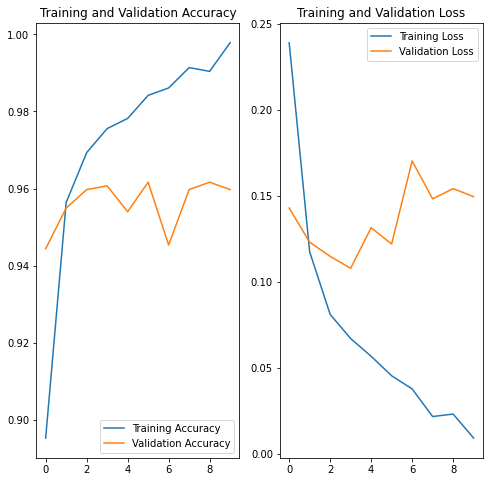

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()